In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.io import imread
from skimage.feature import hog
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage
import glob
import pandas as pd

The glob library in Python provides a convenient way to retrieve files and directories that match a specified pattern or set of patterns. It allows you to perform pattern matching on file names in a directory and retrieve a list of matching file paths.

By importing the glob library, you gain access to its functions and classes for working with file patterns. The primary function provided by the glob library is glob.glob(), which returns a list of file paths that match a specified pattern.

The glob library supports pattern matching using wildcard characters such as * (matches any sequence of characters) and ? (matches any single character). It also allows you to specify multiple patterns or use more complex patterns using regular expressions.

Overall, the glob library provides a simple and convenient way to retrieve file paths based on pattern matching, enabling you to perform operations on multiple files that match specific criteria.

<class 'list'>
8


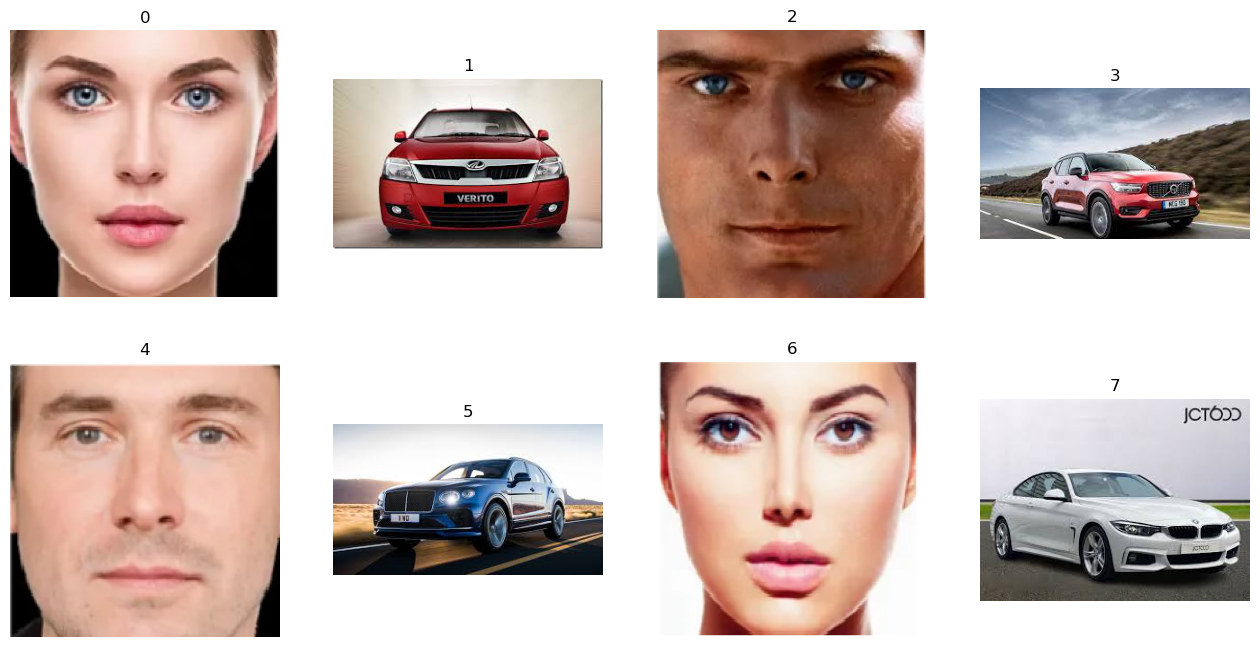

In [2]:
images = [imread(file) for file in glob.glob("C:/Users/Harini Balaji/HariniBalaji/globall/*.jpg")]

print(type(images))
# number of images
n = len(images)
print(n)

# show images

fig = plt.figure(figsize=(16, 8))
for i in range(n):
    fig.add_subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(i)
plt.show()

(28, 28, 4)
(28, 28, 3)
(28, 28, 4)
(28, 28, 3)
(28, 28, 4)
(28, 28, 3)
(28, 28, 4)
(28, 28, 3)


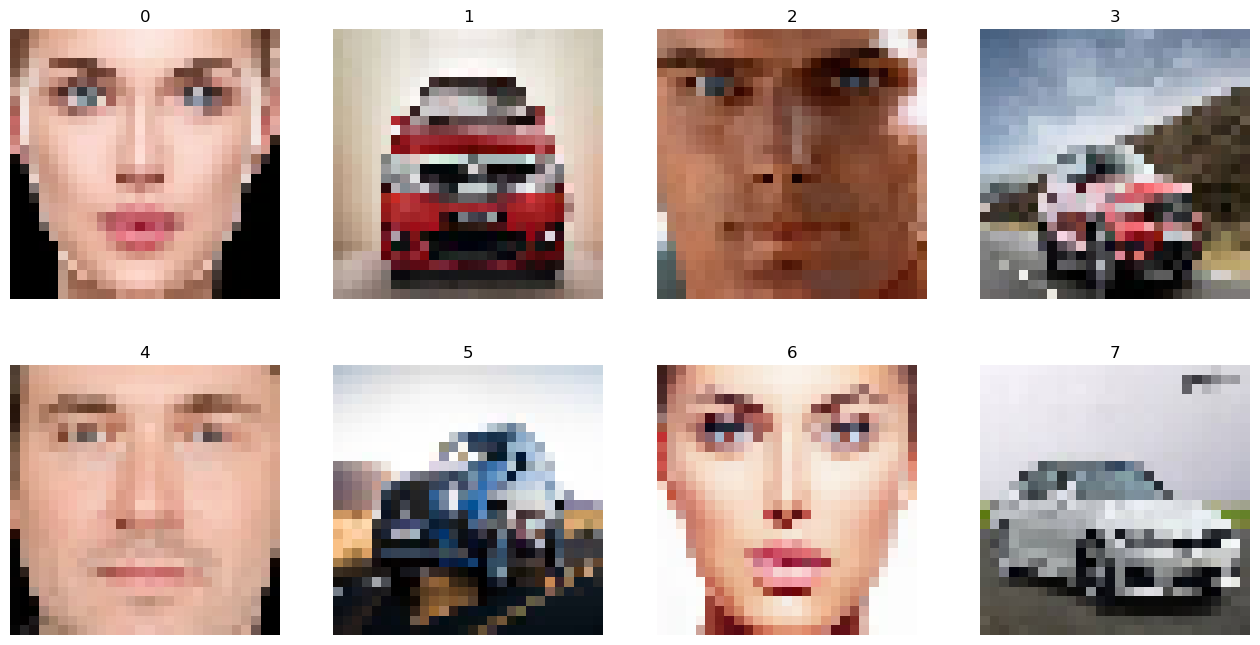

In [3]:
fig = plt.figure(figsize=(16, 8))
for i in range(n):
    fig.add_subplot(2, 4, i+1)
    images[i]= cv2.resize(images[i],(28,28)) 
    plt.axis("off")
    plt.title(i)
    print(images[i].shape)
    plt.imshow(images[i])
plt.show()

C:\Users\Harini Balaji\AppData\Local\Temp\ipykernel_20280\4238585466.py:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(images[i], orientations=8, pixels_per_cell=(


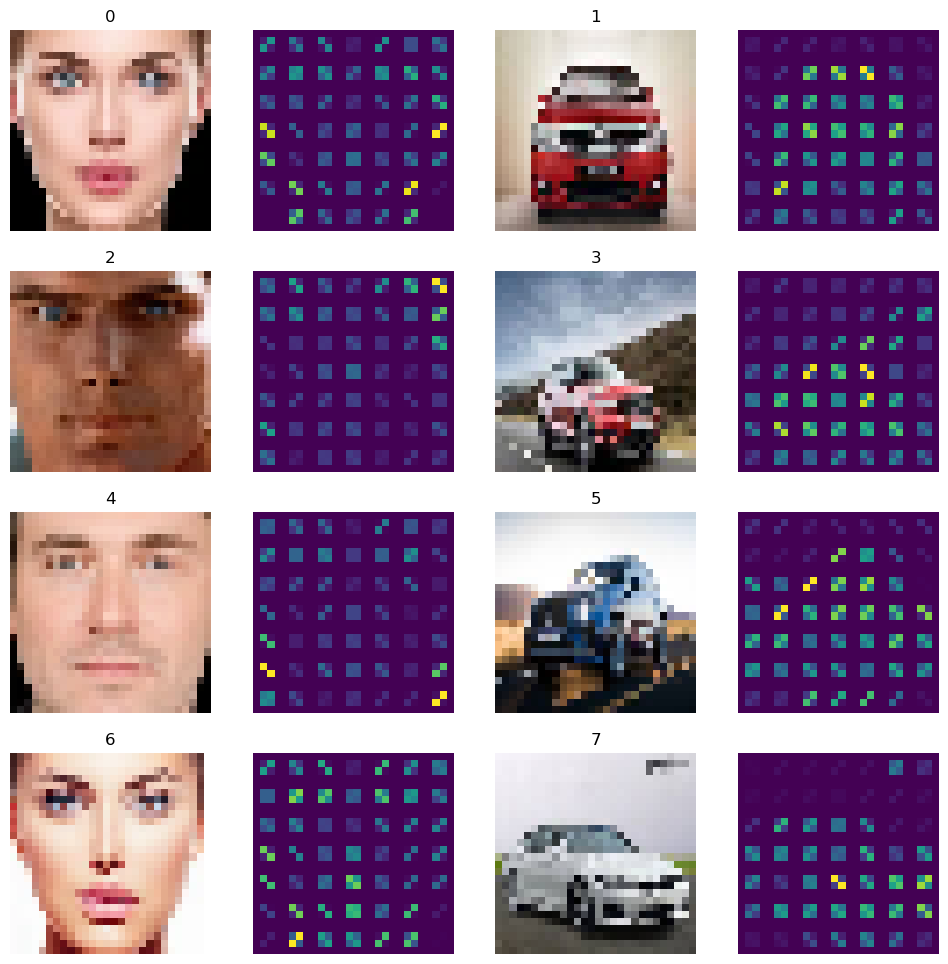

In [4]:
# creating a list to store HOG feature vectors
fd_list = []

fig = plt.figure(figsize=(12, 12))
k = 0

for i in range(n):

    # execute hog function for each image that is imported from skimage.feature module
    fd, hog_image = hog(images[i], orientations=8, pixels_per_cell=(
        4,4), cells_per_block=(2, 2), visualize=True, multichannel=True)

    # add the feature vector to the list
    fd_list.append(fd)

    # display original image
    fig.add_subplot(4, 4, k+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(i)

    # display Hog image
    fig.add_subplot(4, 4, k+2)
    plt.imshow(hog_image)
    plt.axis("off")

    k += 2

plt.show()

HOG (Histogram of Oriented Gradients) is a popular feature descriptor used in computer vision and image processing for object detection and recognition tasks. It captures local shape and gradient information from an image by analyzing the distribution of gradients in different image regions.

The HOG feature extraction process involves the following steps:

Image Preprocessing: The input image is typically preprocessed by converting it to grayscale and applying any necessary normalization or noise reduction techniques.

Gradient Computation: Gradients are calculated by applying image gradient operators, such as the Sobel operator, to obtain the gradient magnitude and direction for each pixel in the image.

Gradient Orientation Binning: The image is divided into small cells, typically square regions. Within each cell, the gradient orientations are quantized into discrete bins. The number of bins represents the level of orientation granularity.

Histogram Calculation: For each cell, a histogram is created by accumulating the gradient magnitudes into the corresponding orientation bins. The magnitude values are weighted based on their proximity to the corresponding bin.

Block Normalization: The image is divided into larger blocks consisting of multiple cells. Within each block, the histograms are normalized to account for variations in lighting and contrast. Common normalization methods include L1-norm, L2-norm, or power normalization.

Descriptor Formation: The final HOG feature descriptor is formed by concatenating the normalized histograms from all the cells within each block. This generates a high-dimensional vector representation of the image that encodes local shape and gradient information.

The HOG descriptor is robust to changes in lighting conditions and provides a compact representation of an object's appearance, making it suitable for object detection algorithms such as Support Vector Machines (SVM) or convolutional neural networks (CNN). It is particularly effective in capturing edge and contour information, making it useful for detecting objects with distinctive shapes or textures.

In [5]:
distance_matrix = np.zeros((n, n))

for i in range(n):
    fd_i = fd_list[i]
    for k in range(i):
        fd_k = fd_list[k]
        distance_matrix[i, k] = distance.jensenshannon(fd_i, fd_k)

# symmetrize the matrix as distance matrix is symmetric
distance_matrix = np.maximum(distance_matrix, distance_matrix.transpose())

print(distance_matrix)

[[0.         0.51357448 0.46696526 0.50773849 0.42678352 0.54947894
  0.36814549 0.55512907]
 [0.51357448 0.         0.50172052 0.47285543 0.50191092 0.48554301
  0.52035657 0.48759057]
 [0.46696526 0.50172052 0.         0.48188131 0.44462243 0.50243267
  0.47508958 0.4861063 ]
 [0.50773849 0.47285543 0.48188131 0.         0.48866803 0.47830792
  0.51663727 0.44723885]
 [0.42678352 0.50191092 0.44462243 0.48866803 0.         0.50755956
  0.43234397 0.51891676]
 [0.54947894 0.48554301 0.50243267 0.47830792 0.50755956 0.
  0.55442456 0.48925493]
 [0.36814549 0.52035657 0.47508958 0.51663727 0.43234397 0.55442456
  0.         0.55676685]
 [0.55512907 0.48759057 0.4861063  0.44723885 0.51891676 0.48925493
  0.55676685 0.        ]]


In a Jensen-Shannon distance matrix, the diagonals are typically set to zero because they represent the distance between a probability distribution and itself. By definition, the distance between a distribution and itself is considered to be zero.

The Jensen-Shannon distance is a measure of the similarity between probability distributions. It is based on the concept of the Kullback-Leibler (KL) divergence, which quantifies the difference between two probability distributions. The Jensen-Shannon distance is derived from the KL divergence and is symmetrical.

When constructing a Jensen-Shannon distance matrix, each entry in the matrix represents the Jensen-Shannon distance between two probability distributions. The diagonal entries in the matrix correspond to the distance between a distribution and itself.

Since a distribution is identical to itself, the distance between them is zero. This aligns with the concept that the distance between an object and itself should always be the shortest possible distance.

Setting the diagonal entries to zero also helps maintain consistency in subsequent analyses and calculations that rely on the distance matrix. It ensures that the distance matrix satisfies mathematical properties and allows for meaningful comparisons between distributions.

In [6]:
cond_distance_matrix = distance.squareform(distance_matrix)

cond_distance_matrix

array([0.51357448, 0.46696526, 0.50773849, 0.42678352, 0.54947894,
       0.36814549, 0.55512907, 0.50172052, 0.47285543, 0.50191092,
       0.48554301, 0.52035657, 0.48759057, 0.48188131, 0.44462243,
       0.50243267, 0.47508958, 0.4861063 , 0.48866803, 0.47830792,
       0.51663727, 0.44723885, 0.50755956, 0.43234397, 0.51891676,
       0.55442456, 0.48925493, 0.55676685])

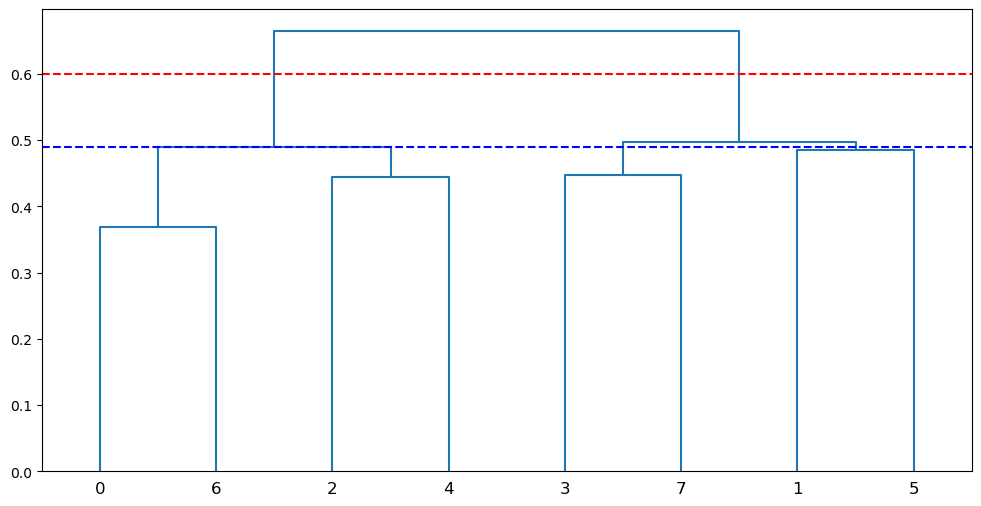

In [7]:
Z = linkage(cond_distance_matrix, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, color_threshold=0.2, show_leaf_counts=True)
plt.axhline(y=0.6, color='r', linestyle='--')
plt.axhline(y=0.49, color='b', linestyle='--')
plt.show()

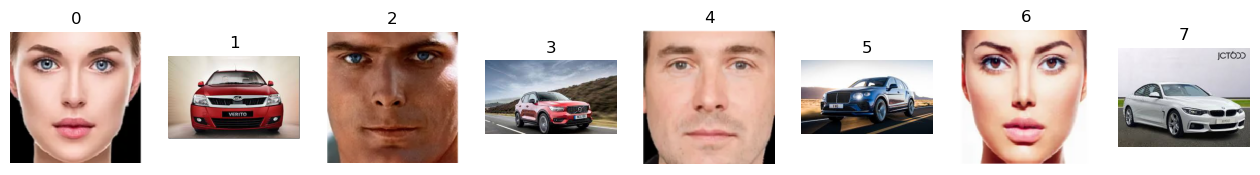

In [8]:
images = [imread(file) for file in glob.glob("C:/Users/Harini Balaji/HariniBalaji/globall/*.jpg")]
fig = plt.figure(figsize=(16, 8))
for i in range(n):
    
    fig.add_subplot(1, 8, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(i)
plt.show()

<class 'list'>
8


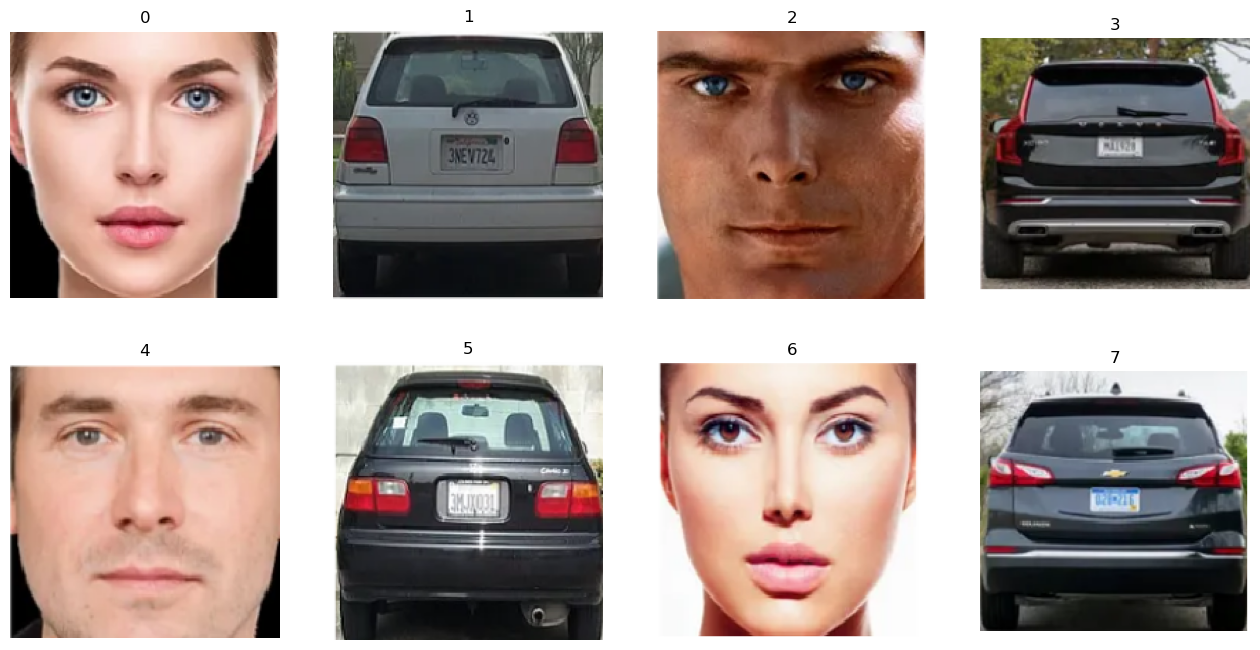

In [9]:
images = [imread(file) for file in glob.glob("C:/Users/Harini Balaji/HariniBalaji/globall2/*.jpg")]

print(type(images))
# number of images
n = len(images)
print(n)

# show images

fig = plt.figure(figsize=(16, 8))
for i in range(n):
    fig.add_subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(i)
plt.show()

(72, 72, 4)
(72, 72, 4)
(72, 72, 4)
(72, 72, 4)
(72, 72, 4)
(72, 72, 4)
(72, 72, 4)
(72, 72, 4)


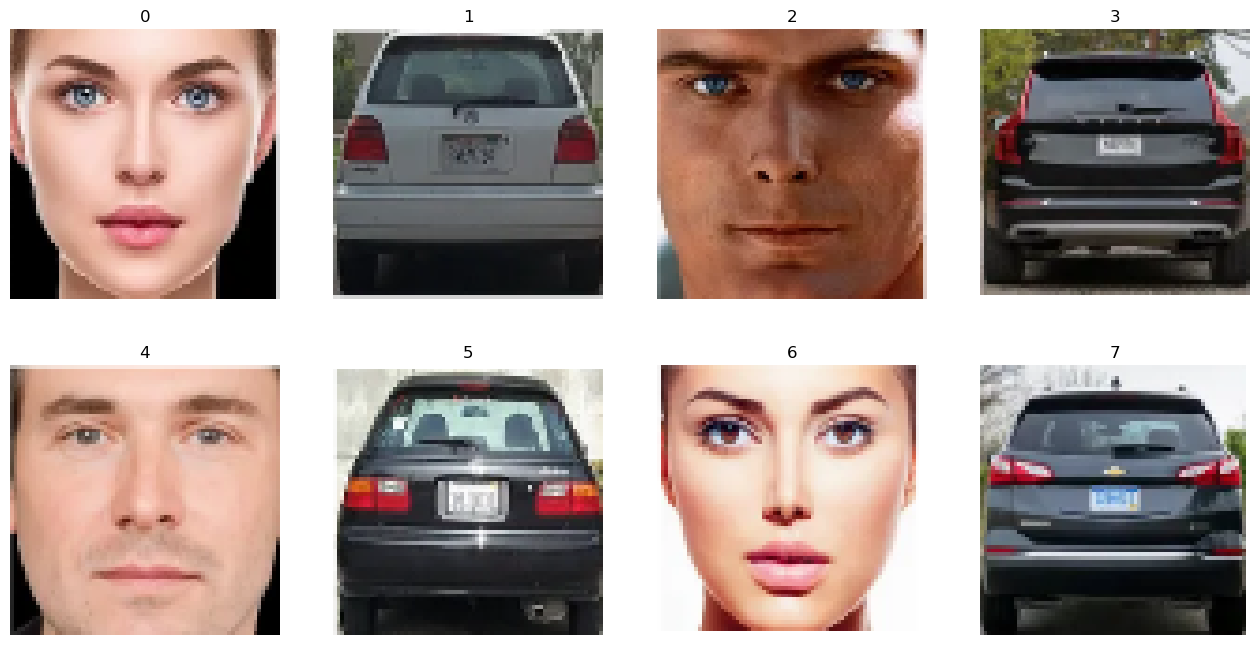

In [10]:
fig = plt.figure(figsize=(16, 8))
for i in range(n):
    fig.add_subplot(2, 4, i+1)
    images[i]= cv2.resize(images[i],(72,72)) 
    plt.axis("off")
    plt.title(i)
    print(images[i].shape)
    plt.imshow(images[i])
plt.show()

C:\Users\Harini Balaji\AppData\Local\Temp\ipykernel_20280\999936551.py:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(images[i], orientations=8, pixels_per_cell=(


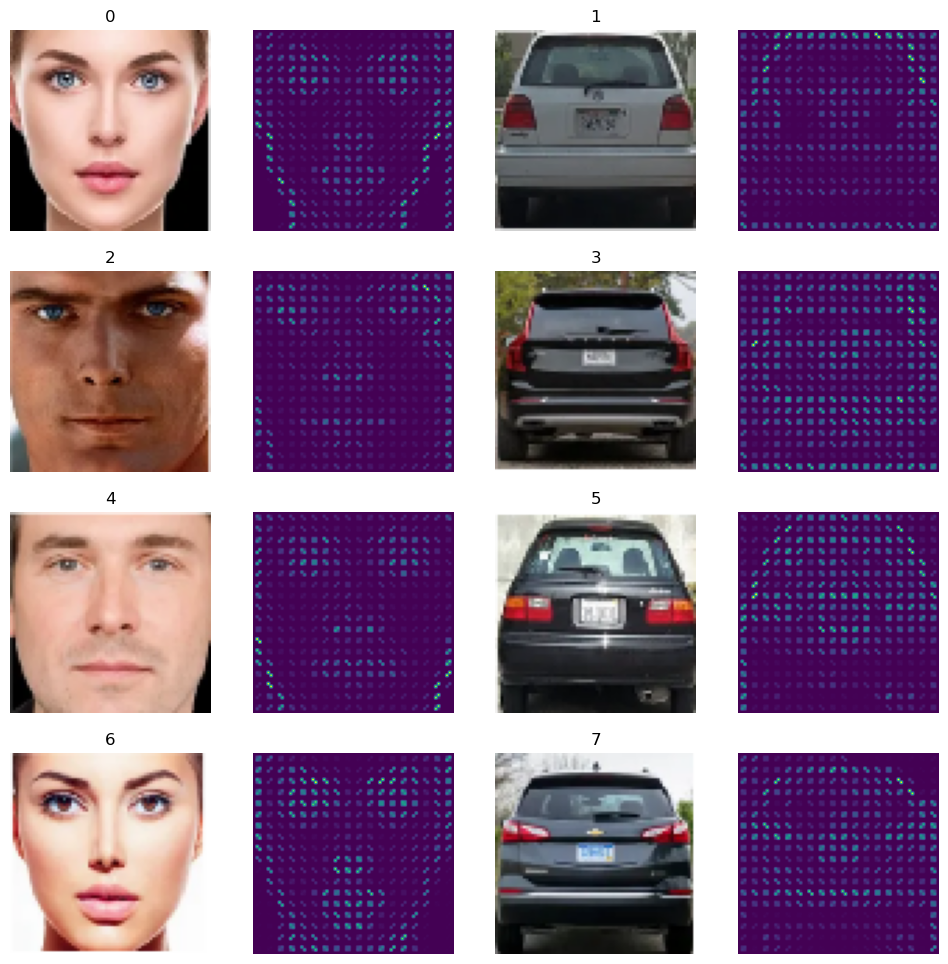

In [11]:
# creating a list to store HOG feature vectors
fd_list = []

fig = plt.figure(figsize=(12, 12))
k = 0

for i in range(n):

    # execute hog function for each image that is imported from skimage.feature module
    fd, hog_image = hog(images[i], orientations=8, pixels_per_cell=(
        4,4), cells_per_block=(2, 2), visualize=True, multichannel=True)

    # add the feature vector to the list
    fd_list.append(fd)

    # display hog image
    fig.add_subplot(4, 4, k+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(i)

    # display original image
    fig.add_subplot(4, 4, k+2)
    plt.imshow(hog_image)
    plt.axis("off")

    k += 2

plt.show()

In [12]:
# create an empty nxn distance matrix
distance_matrix = np.zeros((n, n))

for i in range(n):
    fd_i = fd_list[i]
    for k in range(i):
        fd_k = fd_list[k]
        distance_matrix[i, k] = distance.euclidean(fd_i, fd_k)

# symmetrize the matrix as distance matrix is symmetric
distance_matrix = np.maximum(distance_matrix, distance_matrix.transpose())

print(distance_matrix)

[[ 0.         18.80753234 16.46830581 18.87887846 15.44718963 18.61367812
  11.88396355 18.72645626]
 [18.80753234  0.         17.73393843 13.90456143 17.70854113 13.91661693
  18.78081081 14.9942781 ]
 [16.46830581 17.73393843  0.         17.35387348 15.01572574 17.08500906
  16.48807459 17.00471983]
 [18.87887846 13.90456143 17.35387348  0.         17.74681211 14.01478425
  18.66852353 13.87031747]
 [15.44718963 17.70854113 15.01572574 17.74681211  0.         17.22214508
  15.76766301 17.9135776 ]
 [18.61367812 13.91661693 17.08500906 14.01478425 17.22214508  0.
  18.86152386 14.11106661]
 [11.88396355 18.78081081 16.48807459 18.66852353 15.76766301 18.86152386
   0.         18.83410932]
 [18.72645626 14.9942781  17.00471983 13.87031747 17.9135776  14.11106661
  18.83410932  0.        ]]


In [13]:
cond_distance_matrix = distance.squareform(distance_matrix)

cond_distance_matrix

array([18.80753234, 16.46830581, 18.87887846, 15.44718963, 18.61367812,
       11.88396355, 18.72645626, 17.73393843, 13.90456143, 17.70854113,
       13.91661693, 18.78081081, 14.9942781 , 17.35387348, 15.01572574,
       17.08500906, 16.48807459, 17.00471983, 17.74681211, 14.01478425,
       18.66852353, 13.87031747, 17.22214508, 15.76766301, 17.9135776 ,
       18.86152386, 14.11106661, 18.83410932])

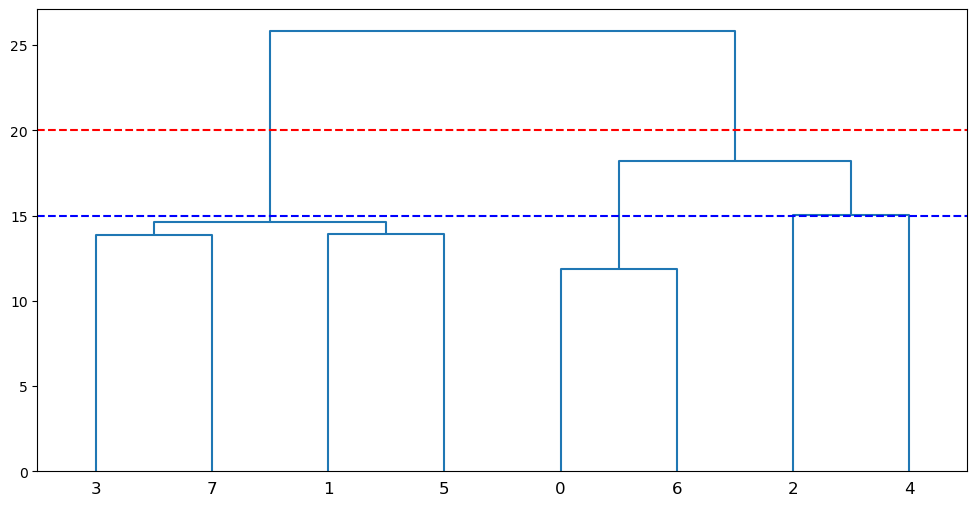

In [14]:
Z = linkage(cond_distance_matrix, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z, color_threshold=0.2, show_leaf_counts=True)

plt.axhline(y=20, color='r', linestyle='--')
plt.axhline(y=15, color='b', linestyle='--')
plt.show()

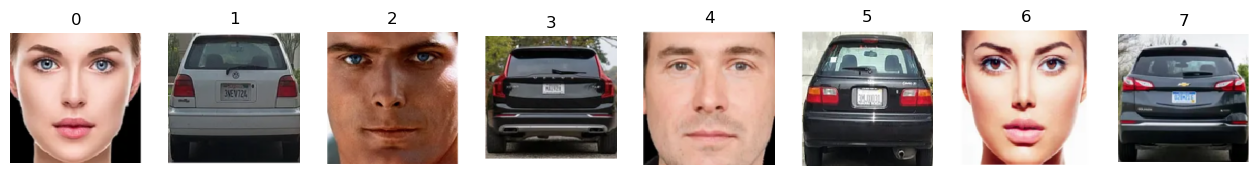

In [15]:
images = [imread(file) for file in glob.glob("C:/Users/Harini Balaji/HariniBalaji/globall2/*.jpg")]
fig = plt.figure(figsize=(16, 8))
for i in range(n):
    fig.add_subplot(1, 8, i+1)
    plt.imshow(images[i])
    plt.axis("off")
    plt.title(i)
plt.show()